# Libraries

In [2]:
# Set up imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from numpy import cos, sin, pi, exp 
import random
import math

# Part 1: Function

## Simulated Annealing Function

In [3]:
def SimAnn(f,r,t = 10, d = 0.99):
    # Initial temperature
    T = t
    decayrate = d
    # Set up some large value for the best cost found so far
    bestcost = 100000
    # Generate several values within a search 'space' and check whether the new value is better
    # than the best seen so far.
    bestx = r[0]
    rl, rh = r[0], r[1]
    fig, ax = plt.subplots()
    xbase = np.linspace(rl,rh,100)
    ybase = f(xbase)
    ax.plot(xbase, ybase)
    xall, yall = [], []
    lnall,  = ax.plot([], [], 'ro')
    lngood, = ax.plot([], [], 'go', markersize=10)
    def onestep(frame):
        nonlocal bestcost, bestx, decayrate, T
        dx = (np.random.random_sample() - 0.5) * T
        x = bestx + dx
        y = f(x)
        if y < bestcost:
            bestcost = y
            bestx = x
            lngood.set_data(x, y)
        else:
            toss = np.random.random_sample()
            if toss < np.exp(-(y-bestcost)/T):
                bestcost = y
                bestx = x
                lngood.set_data(x, y)
            pass
        T = T * decayrate
        xall.append(x)

        yall.append(y)
        lnall.set_data(xall, yall)

    ani= FuncAnimation(fig, onestep, frames=range(10000), interval=10, repeat=False)
    return ani

## Function to test

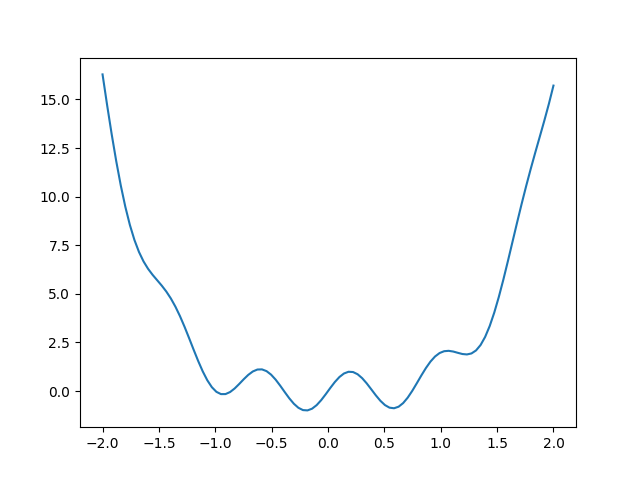

In [4]:
def f(x):
    return x**4 + np.sin(8*(x))
ans = SimAnn(f,[-2,2])
plt.show()

# Part - 2: Travelling Salesman

The traveling salesman problem gives you a set of city locations (x, y coordinates). Your goal is to find a route from a given starting point that visits all the cities exactly once and then returns to the origin, with the minimum total distance covered (distance is measured as Euclidean distance 	$\sqrt{(𝑥2 − 𝑥1)^2 + (𝑦2 − 𝑦1)^2}$.
You will be given a file where the first line is the number of cities N, and the next N lines give the cities as a list of x, y coordinates: for example  
       
     4  
     0.0 1.5  
     2.3 6.1  
     4.2 1.3  
     2.1 4.5  
Your goal is to give a sequence of numbers, for example [0, 3, 2, 1] which specifies the order in which to visit the cities. Note that after the last city you will come back to the first one in the list.
Plot the cities with the path you have specified, and output the total length of the shortest path discovered so


In [5]:
def Dataset(file_path):
    a = []
    with open(file_path, 'r') as file:
        data = file.readlines()
        data.pop(0)
    for lines in data:
        data = lines.split()
        b = [data[0],data[1]]
        a.append(b)
        npa = np.array(a,dtype = np.float64)
    return npa

In [6]:
def distance(city1, city2):
    return math.sqrt((city1[0]-city2[0])**2 + (city1[1]-city2[1])**2)

def total_distance(path, cities):
    dist = 0
    for i in range(len(path)-1):
        dist += distance(cities[path[i]], cities[path[i+1]])
    dist += distance(cities[path[-1]], cities[path[0]])
    return dist

In [7]:
def simulated_annealing(cities, T=1, alpha=1e-4, stopping_T=1e-8):
    cur_path = list(range(len(cities)))
    random.shuffle(cur_path)

    best_path = cur_path[:]
    best_distance = total_distance(best_path, cities)

    cur_distance = total_distance(cur_path, cities)

    while T > stopping_T:
        
        new_path = cur_path[:]
        rand_city1 = random.randint(0, len(new_path)-1)
        rand_city2 = random.randint(0, len(new_path)-1)
        new_path[rand_city1], new_path[rand_city2] = new_path[rand_city2], new_path[rand_city1]

        new_distance = total_distance(new_path, cities)

        if new_distance < cur_distance:
            cur_path = new_path
            cur_distance = new_distance
            if cur_distance < best_distance:
                best_path = cur_path[:]
                best_distance = cur_distance
        else:
            delta = new_distance - cur_distance
            p = math.exp(-delta / T)
            if random.random() < p:
                cur_path = new_path
                cur_distance = new_distance

        T *= (1-alpha)

    return best_path, best_distance


## 10 Cities

In [8]:
cities = Dataset("tsp_10.txt")
path, best_distance = simulated_annealing(cities)
x_cities , y_cities = [],[]
for a in cities:
    x_cities.append(a[0])
    y_cities.append(a[1])
print(path)
print(best_distance)


[1, 3, 4, 5, 6, 0, 2, 8, 9, 7]
34.07656139463669


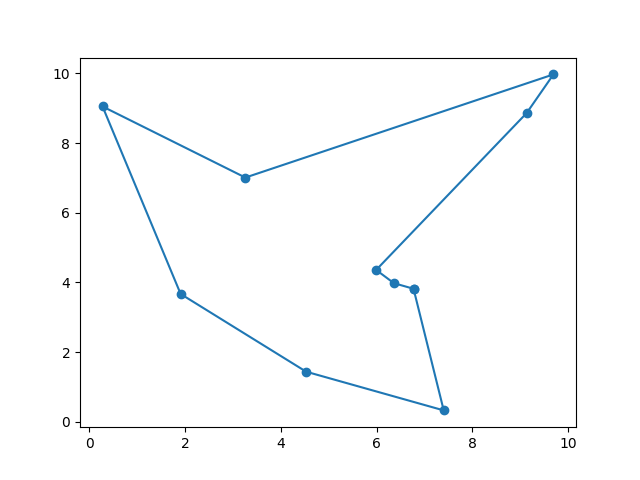

In [9]:
x_cities , y_cities = [],[]
for a in cities:
    x_cities.append(a[0])
    y_cities.append(a[1])
    
x_cities = np.array(x_cities)
y_cities = np.array(y_cities)
xplot = x_cities[path] 
yplot = y_cities[path]
xplot = np.append(xplot, xplot[0])
yplot = np.append(yplot, yplot[0])
plt.close()
plt.plot(xplot, yplot, 'o-')
plt.show()

## 100 Cities

In [19]:
cities100 = Dataset("tsp_100.txt")
path100, best_distance100 = simulated_annealing(cities100 ,T=10, alpha=0.00001, stopping_T=1e-9)
print(path100)
print(best_distance100)

[9, 66, 91, 28, 64, 17, 88, 16, 76, 6, 80, 18, 99, 34, 0, 95, 63, 38, 57, 12, 72, 60, 24, 94, 8, 26, 78, 67, 61, 84, 42, 50, 39, 15, 86, 25, 30, 19, 52, 65, 93, 14, 27, 7, 36, 22, 21, 54, 3, 55, 31, 97, 53, 96, 77, 35, 10, 85, 23, 13, 58, 46, 82, 75, 48, 49, 51, 68, 47, 56, 45, 87, 92, 74, 40, 5, 2, 89, 4, 41, 73, 90, 71, 59, 29, 11, 37, 81, 44, 1, 70, 79, 43, 32, 33, 62, 98, 69, 83, 20]
93.42351419602397


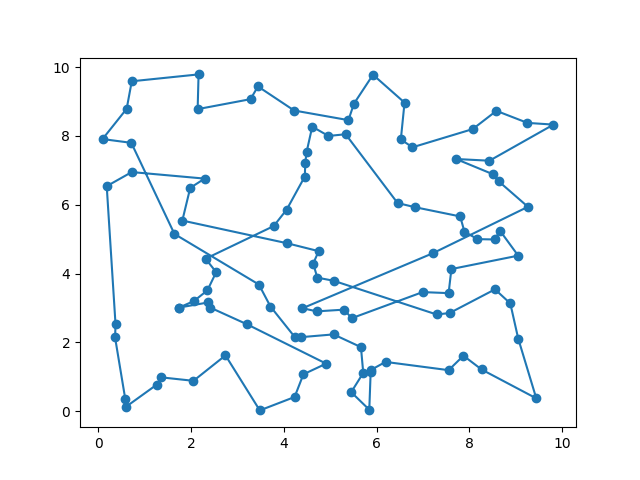

In [21]:
x_cities100 , y_cities100 = [],[]
for a in cities100:
    x_cities100.append(a[0])
    y_cities100.append(a[1])
x_cities100 = np.array(x_cities100)
y_cities100 = np.array(y_cities100)

xplot = x_cities100[path100] 
yplot = y_cities100[path100]
xplot = np.append(xplot, xplot[0])
yplot = np.append(yplot, yplot[0])

plt.close()
plt.plot(xplot, yplot, 'o-')
plt.show()